In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("/content/training dataset.csv")

In [3]:
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
113879,NTM2,X1,A37,DIRECT,Large,Powder,Feb-21,180.00
113880,NTM1,X1,A7,DIRECT,Large,Liquid,Apr-21,171.78
113881,NTM1,X2,A45,DIRECT,Large,Powder,Dec-20,27.22
113882,NTM2,X1,A6,DIRECT,Large,Liquid,Feb-21,142.61


In [4]:
test_data = pd.read_csv("/content/test dataset.csv")
test_data=test_data.dropna()
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113884 entries, 0 to 113883
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        113884 non-null  object 
 1   Manufacturer       113884 non-null  object 
 2   Area Code          113884 non-null  object 
 3   Sourcing Channel   113884 non-null  object 
 4   Product Size       113884 non-null  object 
 5   Product Type       113884 non-null  object 
 6   Month of Sourcing  113884 non-null  object 
 7   Sourcing Cost      113883 non-null  float64
dtypes: float64(1), object(7)
memory usage: 7.0+ MB


In [6]:
train_data.nunique()

ProductType             3
Manufacturer            2
Area Code              27
Sourcing Channel        4
Product Size            2
Product Type            2
Month of Sourcing      12
Sourcing Cost        1951
dtype: int64

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.8+ KB


In [8]:
test_data.nunique()

ProductType           3
Manufacturer          3
Area Code            45
Sourcing Channel      4
Product Size          3
Product Type          2
Month of Sourcing     1
Sourcing Cost        95
dtype: int64

In [9]:
train_data=train_data.dropna()

In [10]:
train_data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [11]:
train_data.describe()

,Sourcing Cost
count,113883.000000
mean,122.816924
std,68.327446
min,-57.600000
25%,95.000000
50%,139.850000
75%,150.060000
max,5425.920000


<Axes: xlabel='Month of Sourcing', ylabel='count'>

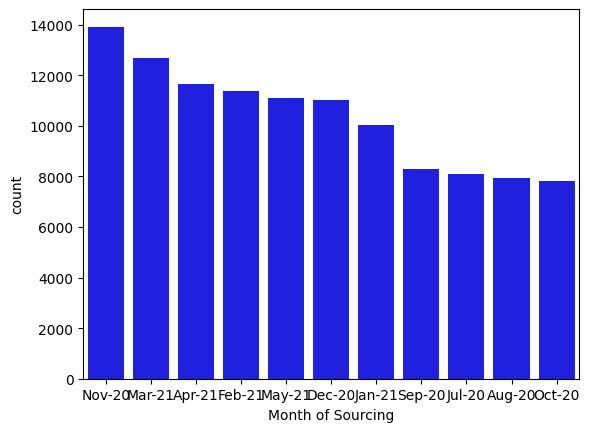

In [12]:
sns.countplot(x = 'Month of Sourcing', data = train_data, color = 'blue',
              order = train_data['Month of Sourcing'].value_counts().index)

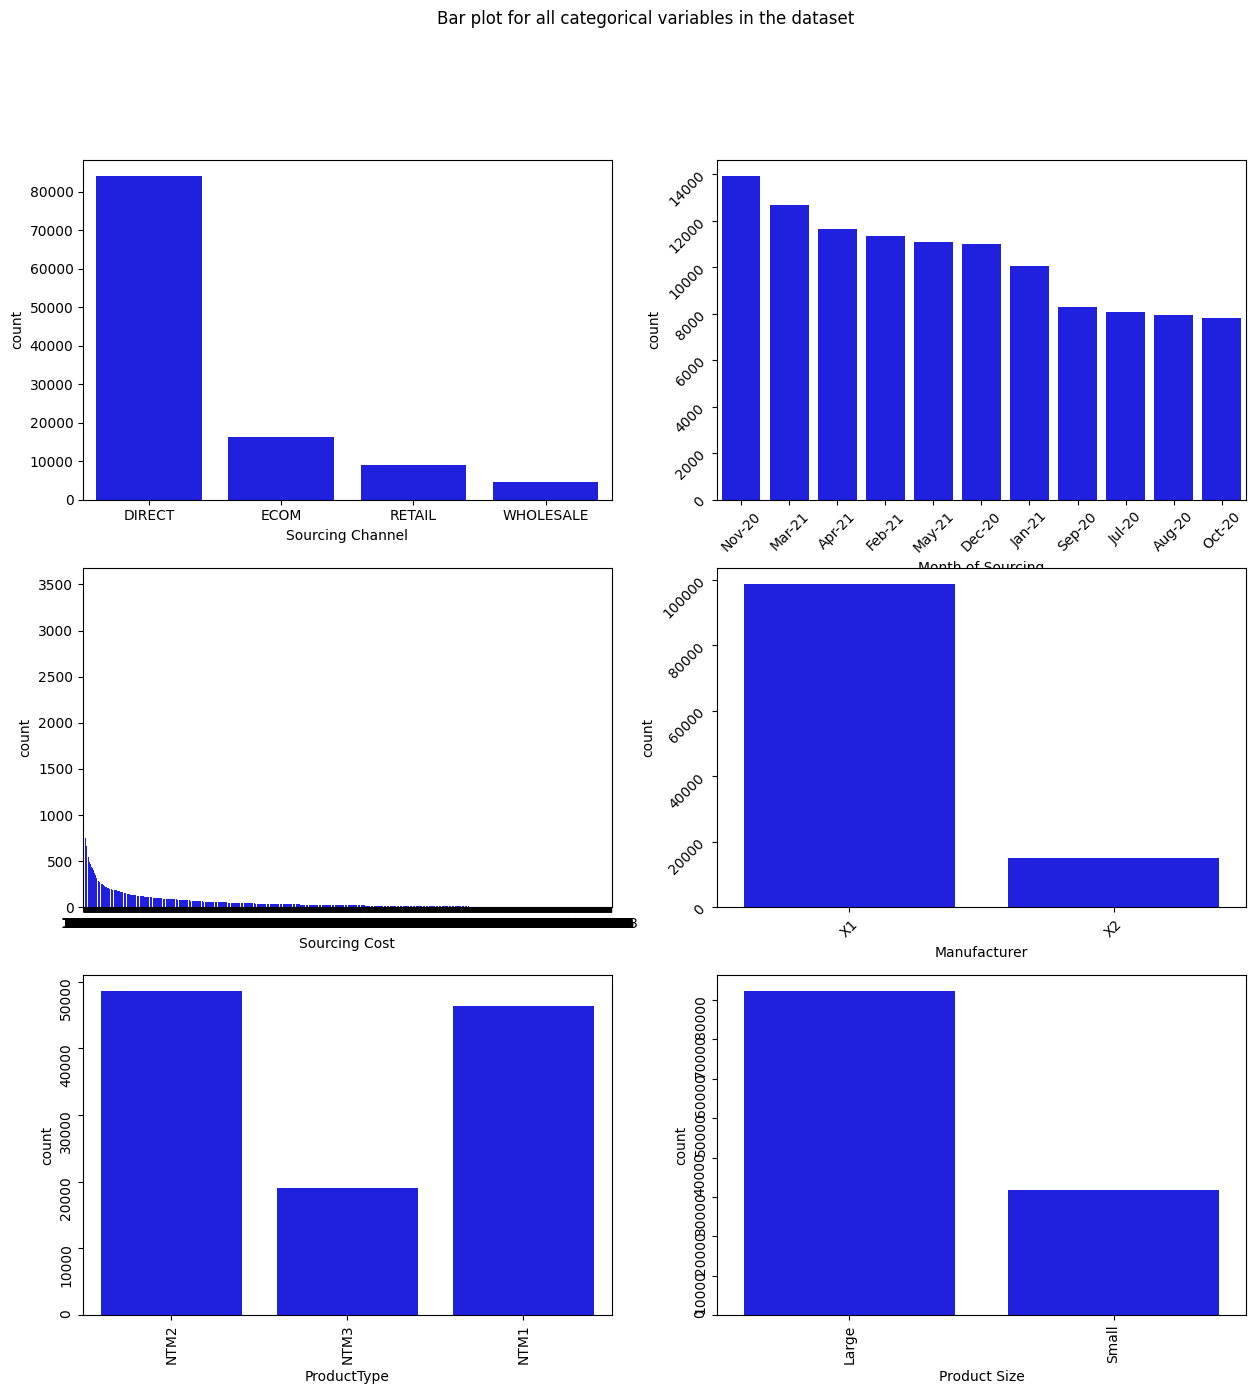

In [13]:
fig, axes = plt.subplots(3, 2, figsize = (15, 15))

fig.suptitle('Bar plot for all categorical variables in the dataset')


sns.countplot(ax = axes[0, 0], x = 'Sourcing Channel', data = train_data, color = 'blue',
              order = train_data['Sourcing Channel'].value_counts().index);


sns.countplot(ax = axes[0, 1], x = 'Month of Sourcing', data = train_data, color = 'blue',
              order = train_data['Month of Sourcing'].value_counts().index);


sns.countplot(ax = axes[1, 0], x = 'Sourcing Cost', data = train_data, color = 'blue',
              order = train_data['Sourcing Cost'].value_counts().index);


sns.countplot(ax = axes[1, 1], x = 'Manufacturer', data = train_data, color = 'blue',
              order = train_data['Manufacturer'].value_counts().index);


sns.countplot(ax = axes[2, 0], x = 'ProductType', data = train_data, color = 'blue',
              order = train_data['ProductType'].head(20).value_counts().index);


sns.countplot(ax = axes[2, 1], x = 'Product Size', data = train_data, color = 'blue',
              order = train_data['Product Size'].head(20).value_counts().index);


axes[0][1].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


<Figure size 1000x500 with 0 Axes>

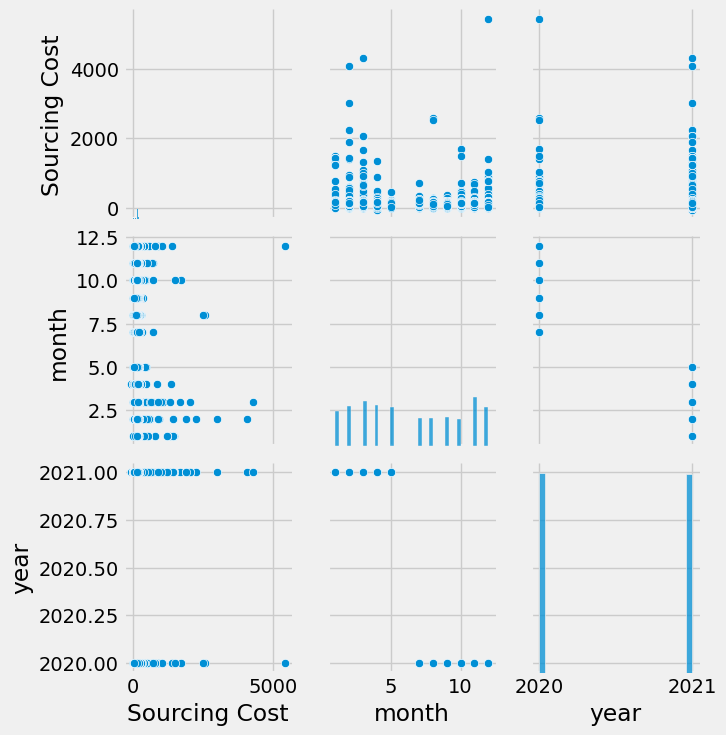

In [29]:
plt.figure(figsize=(10,5))
sns.pairplot(data=train_data)
plt.show()

In [15]:
train_data['Month of Sourcing'] = pd.to_datetime(train_data['Month of Sourcing'], format='%b-%y')
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
113878,NTM1,X1,A7,DIRECT,Large,Liquid,2021-03-01,174.02
113879,NTM2,X1,A37,DIRECT,Large,Powder,2021-02-01,180.00
113880,NTM1,X1,A7,DIRECT,Large,Liquid,2021-04-01,171.78
113881,NTM1,X2,A45,DIRECT,Large,Powder,2020-12-01,27.22


In [16]:
test_data['Month of Sourcing'] = pd.to_datetime(test_data['Month of Sourcing'], format='%b-%y')
test_data = test_data.dropna()
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-06-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2021-06-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2021-06-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-06-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2021-06-01,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2021-06-01,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2021-06-01,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2021-06-01,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2021-06-01,32.32


In [17]:
train_data = train_data.set_index('Month of Sourcing')
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-05-01,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16
2020-10-01,NTM2,X1,A9,DIRECT,Large,Powder,134.28
2020-12-01,NTM3,X2,A20,DIRECT,Large,Powder,12.46
2021-02-01,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22
2020-11-01,NTM2,X1,A28,DIRECT,Large,Liquid,197.76
...,...,...,...,...,...,...,...
2021-03-01,NTM1,X1,A7,DIRECT,Large,Liquid,174.02
2021-02-01,NTM2,X1,A37,DIRECT,Large,Powder,180.00
2021-04-01,NTM1,X1,A7,DIRECT,Large,Liquid,171.78


In [18]:
test_data = test_data.set_index('Month of Sourcing')
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-06-01,NTM1,X1,A1,DIRECT,Small,Powder,103.68
2021-06-01,NTM1,X1,A10,DIRECT,Large,Powder,155.75
2021-06-01,NTM1,X1,A10,ECOM,Large,Powder,143.02
2021-06-01,NTM1,X1,A11,DIRECT,Large,Powder,139.39
2021-06-01,NTM1,X1,A2,DIRECT,Large,Powder,169.42
...,...,...,...,...,...,...,...
2021-06-01,NTM3,X1,A44,DIRECT,Small,Liquid,89.57
2021-06-01,NTM3,X1,A8,DIRECT,Large,Powder,114.57
2021-06-01,NTM3,X1,A8,DIRECT,Small,Powder,111.26


In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

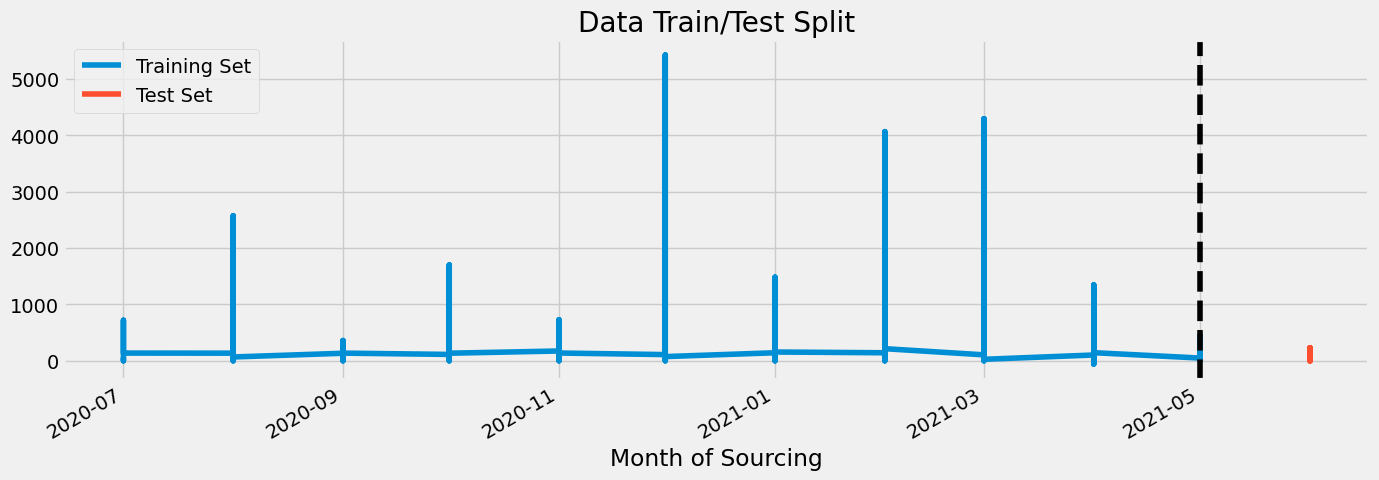

In [20]:
train = train_data.loc[train_data.index < '06-2021']
test = test_data.loc[test_data.index >= '05-2020']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('05-2021', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [21]:
def create_features(train_data):
    """
    Create time series features based on time series index.
    """
    train_data = train_data.copy()

    train_data['month'] = train_data.index.month
    train_data['year'] = train_data.index.year

    return train_data

train_data = create_features(train_data)

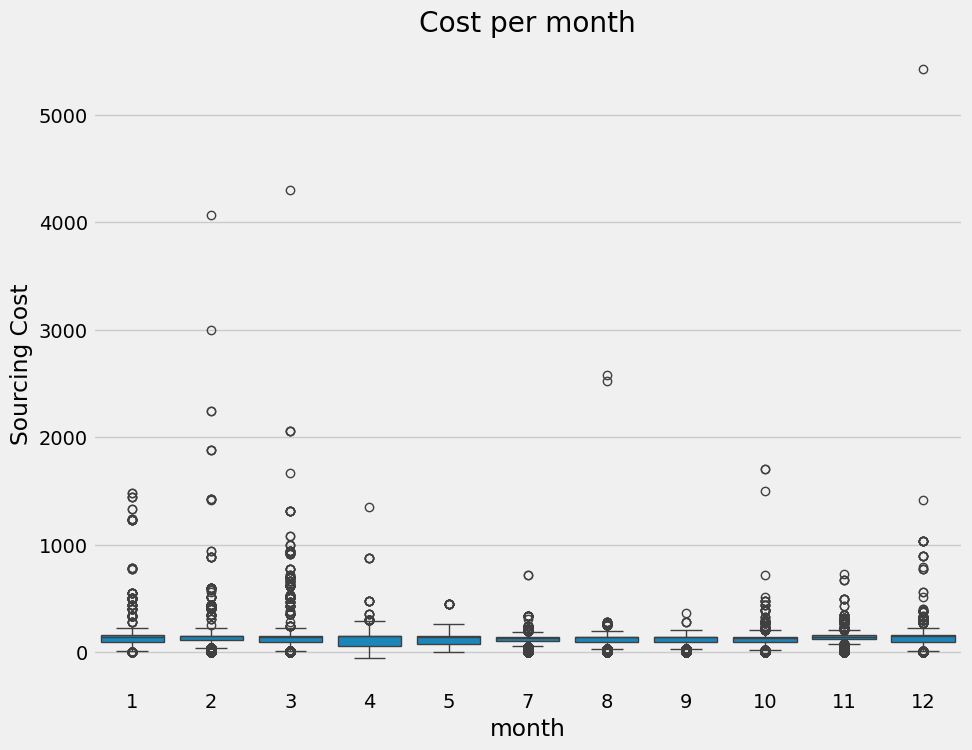

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train_data, x='month', y='Sourcing Cost')
ax.set_title('Cost per month')
plt.show()

In [23]:
train = create_features(train)
test = create_features(test)

FEATURES = ['month', 'year']
TARGET = 'Sourcing Cost'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [24]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:139.03765	validation_1-rmse:116.76130
[100]	validation_0-rmse:81.21048	validation_1-rmse:60.04183
[200]	validation_0-rmse:69.91497	validation_1-rmse:52.15270
[268]	validation_0-rmse:68.49255	validation_1-rmse:52.34295


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

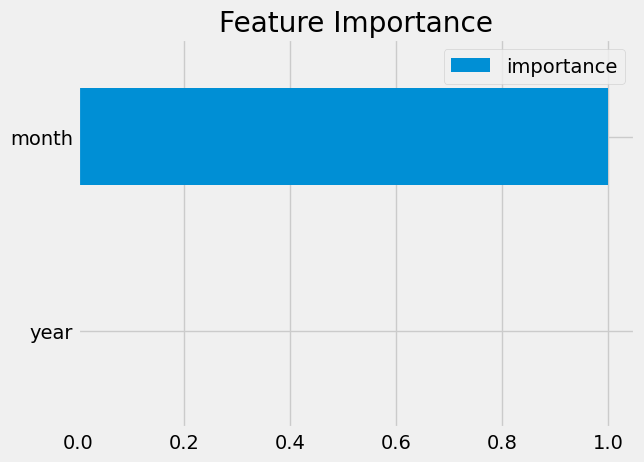

In [25]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

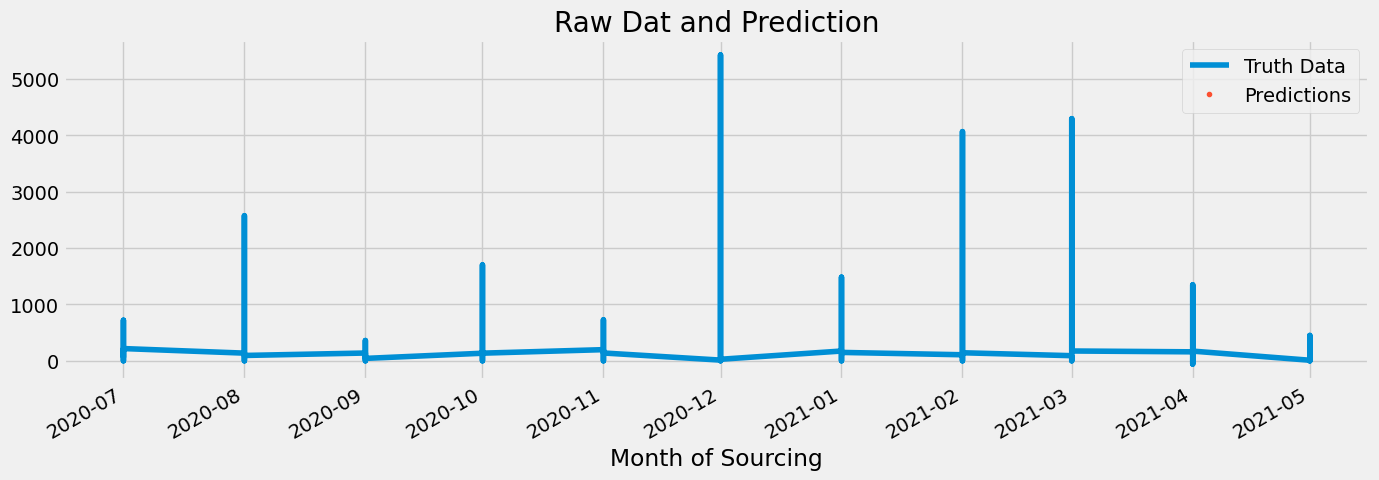

In [26]:
test['prediction'] = reg.predict(X_test)
df = train_data.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Sourcing Cost']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [27]:
score = np.sqrt(mean_squared_error(test['Sourcing Cost'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 52.09


In [28]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2021-06-01    45.490659
Name: error, dtype: float64

Compare and explain the different approaches you might have considered.

i would have considered the ARIMA, exponential smoothening or RNN and if there is a need of any computationally expensive CNN and wavenet can be used. based on the required work to be done on the dataset we can choose the model we implement. we can use any approachs to get different ideas and understanding for the given dataset

Explain the final approach you have taken and why.

in this notebook i have used the XGBoost method to solve the given problem.XGBoost is an ensemble method to solve the time series analysis and prediction problems. the porpose of using XGBoost was that the ensemble modals are combination of different modals and can provide better accuracy in such cases. it efficiently captures the nonlinear relationship between features and target which makes it easier to train and test the data. it also provides an idea about the important features which is helpful in testing and visualisation of the data.
afterall this is one of the most used approach for such type of data we can use other methods too to get more knowledge on the dataset.   